In [1]:
# load data
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# data attributes
x_train = train_images.reshape(60000, 784)
x_test = test_images.reshape(10000, 784)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

from keras.utils import np_utils
y_train = np_utils.to_categorical(train_labels)
y_test = np_utils.to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
# plot_history function
def plot_history(net_history):
    history = net_history.history
    import matplotlib.pyplot as plt
    print(history.keys())
    losses = history['loss']
    val_losses = history['val_loss']
    accuracies = history['accuracy']
    val_accuracies = history['val_accuracy']
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(losses)
    plt.plot(val_losses)
    plt.legend(['loss', 'val_loss'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(accuracies)
    plt.plot(val_accuracies)
    plt.legend(['acc', 'val_acc'])

In [7]:
# sequential model
from keras.models import Sequential
from keras.layers import Dense, Dropout   # regularization & dropout
from keras.optimizers import SGD  # gradient decsent
from keras.losses import categorical_crossentropy

# create model
my_model = Sequential()

# add a dense layer
my_model.add(Dense(500, activation='relu', input_shape=(784,))) # the first layer it must have input_shape
my_model.add(Dropout(rate=0.2))                 # if model has overfit, we can reduce it by adding dropout
my_model.add(Dense(100, activation='relu'))
my_model.add(Dropout(rate=0.2))
my_model.add(Dense(10, activation='softmax'))   # output is not binary(sigmoid) so use softmax

my_model.summary()
my_model.compile(optimizer=SGD(lr=0.001), loss=categorical_crossentropy, metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 500)               392500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               50100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
375/375 [==============================] - 4s 9ms/step - loss: 2.2234 - accuracy: 0.2163 - val_loss: 2.0589 - val_accuracy: 0.4498
Epoch 2/10
375/375 [==============================] - 3s 9ms/step - loss: 1.9727 - accuracy: 0.4218 - val_loss: 1.7910 - val_accuracy: 0.6423
Epoch 3/10
375/375 [==============================] - 3s 9ms/step - loss: 1.7309 - accuracy: 0.5479 - val_loss: 1.5264 - val_accuracy: 0.7293
Epoch 4/10
375/375 [==============================] - 3s 9ms/step - loss: 1.5002 - accuracy: 0.6226 - val_loss: 1.2881 - val_accuracy: 0.7728
Epoch 5/10
375/375 [==============================] - 4s 11ms/step - loss: 1.3032 - accuracy: 0.6690 - val_loss: 1.0954 - val_accuracy: 0.8014
Epoch 6/10
375/375 [==============================] - 4s 10ms/step - loss: 1.1506 - accuracy: 0.7025 - val_loss: 0.9481 - val_accuracy: 0.8197
Epoch 7/10
375/375 [==============================] - 3s 9ms/step - loss: 1.0327 - accuracy: 0.7263 - val_loss: 0.8372 - val_accuracy: 0.8338
Epoc

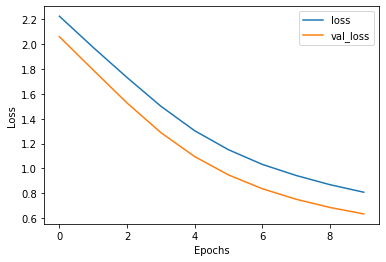

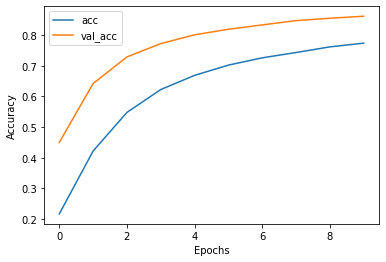

In [8]:
# train the model
network_history = my_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_split=0.2)
plot_history(network_history)

In [9]:
# evaluation
test_loss, test_acc = my_model.evaluate(x_test, y_test)
test_labels_predict = my_model.predict(x_test)

import numpy as np
test_labels_predict = np.argmax(test_labels_predict, axis=1)

print(test_labels_predict[2])
print(y_test[2])

313/313 [==============================] - 1s 2ms/step - loss: 0.6332 - accuracy: 0.8576
1
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
